variance =  0.21
expectation =  0.3


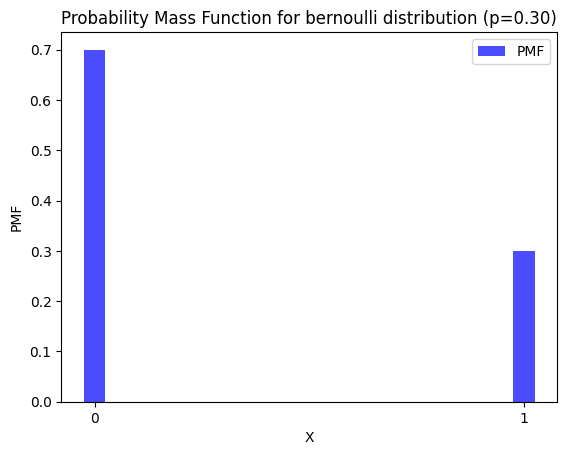

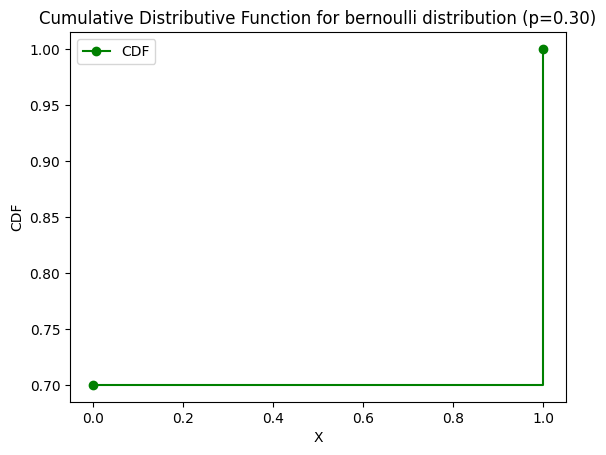

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


# Generate bernoulli random variables 
def generate_bernoulli(p, size):
    random_variables = []  # Initialize an empty list to store generated random variables
    for _ in range(size):  # Loop 'size' times to generate the specified number of random variables
        outcome = 1 if random.random() <= p else 0  # Generate a random outcome based on probability p
        random_variables.append(outcome)  # Add the outcome to the list
    return random_variables  # Return the list of generated random variables



# Caclulate PMF
def bernoulli_pmf(x, p):
    return p**x * (1-p)**(1-x)

#Calculate CDF
def bernoulli_cdf(x, p):
    if x < 0:
        return 0
    elif 0 <= x < 1:
        return 1 - p
    else:
        return 1

#Caclulate variance
def bernoulli_variance(p):
    return p * (1-p)

#Calculate Expectation (mean)
def bernoulli_expectation(p):
    return p

#plot pmf
def plot_pmf(p):
    pmf_values = [bernoulli_pmf(x, p) for x in unique_values]
    plt.bar(unique_values, pmf_values, color='blue',align='center', alpha=0.7, width=0.05, label='PMF')
    plt.xticks(unique_values)
    plt.xlabel('X')
    plt.ylabel('PMF')
    plt.title(f'Probability Mass Function for bernoulli distribution (p={p:.2f})')
    plt.legend()
    plt.show()

#plot cdf
def plot_cdf(p):
    cdf_values = [bernoulli_cdf(x,p) for x in unique_values]
    plt.step(unique_values, cdf_values,marker='o', color='green', where='post', label='CDF')
    plt.title(f'Cumulative Distributive Function for bernoulli distribution (p={p:.2f})')
    plt.xlabel('X')
    plt.ylabel('CDF')
    plt.legend()
    plt.show()

#Set probability of success parameter
p = 0.3

#Set size of generated random variables
size = 10000

#Store generated random variables
bernoulli_variables = generate_bernoulli(p, size)

#Get the unique values in generated bernoulli variables
unique_values, counts = np.unique(bernoulli_variables, return_counts=True)

#Printing variance and exception
print ("variance = ", bernoulli_variance(p))
print ("expectation = ", bernoulli_expectation(p))

#show results
plot_pmf(p)
plot_cdf(p)
